### Credit risk

Credit Risk is the probable risk of loss resulting from a borrower's failure to repay a loan or meet contractual obligations. If a company offers credit to its client, there is a risk that its clients may not pay their invoices.

### Types of Credit Risk

Good Risk: An investment that one believes is likely to be profitable. The term most often refers to a loan made to a creditworthy person or company. Good risks are considered exceptionally likely to be repaid.

Bad Risk: A loan that is unlikely to be repaid because of bad credit history, insufficient income, or some other reason. A bad risk increases the risk to the lender and the likelihood of default on the part of the borrower.

### Frequency of classes
Good: 700

Bad: 300


In [2]:
import pandas as pd
import numpy as np

In [3]:
credit_scoring = pd.read_csv('credit.csv')
credit_scoring.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',buy_radio_tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',buy_radio_tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',buy_furniture_equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously',buy_new_car,4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


## Ordinal or normal

We have a variety of categorical columns to predict the class of the credit application. Each column will need to be explored to see which ones are ordinal and nominal


### Predictor analysis to determine whether an ordinal relationship exists for categorical variables

Considering:
* proportion of population in variable in each class label
* size of population in each variable
* common sense relationship between variable and credit risk value

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def get_information(var, orient="v"):
    # Graph
    sns.countplot(data=credit_scoring, x=var, hue="class")
    plt.show()
    
    # table
    for x in credit_scoring[var].unique():
        print(x, credit_scoring[credit_scoring[var]==x].shape[0])
        print(credit_scoring[credit_scoring[var]==x]['class'].value_counts(True))
    

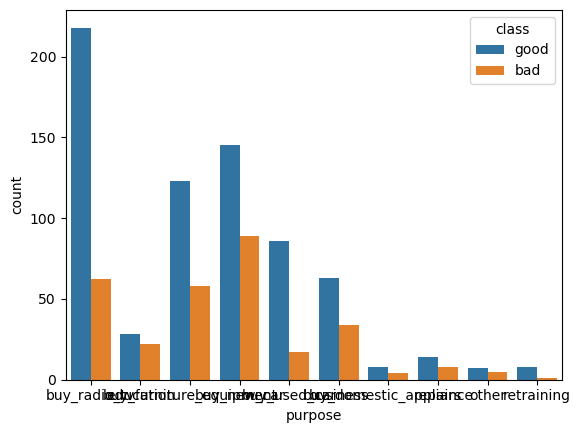

buy_radio_tv 280
good    0.778571
bad     0.221429
Name: class, dtype: float64
education 50
good    0.56
bad     0.44
Name: class, dtype: float64
buy_furniture_equipment 181
good    0.679558
bad     0.320442
Name: class, dtype: float64
buy_new_car 234
good    0.619658
bad     0.380342
Name: class, dtype: float64
buy_used_car 103
good    0.834951
bad     0.165049
Name: class, dtype: float64
business 97
good    0.649485
bad     0.350515
Name: class, dtype: float64
buy_domestic_appliance 12
good    0.666667
bad     0.333333
Name: class, dtype: float64
repairs 22
good    0.636364
bad     0.363636
Name: class, dtype: float64
other 12
good    0.583333
bad     0.416667
Name: class, dtype: float64
retraining 9
good    0.888889
bad     0.111111
Name: class, dtype: float64


In [6]:
get_information('purpose')

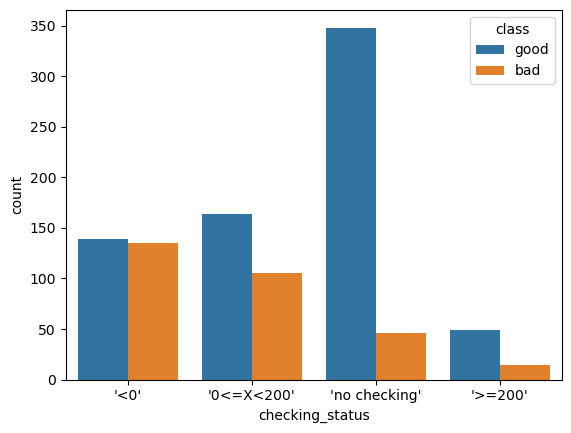

'<0' 274
good    0.507299
bad     0.492701
Name: class, dtype: float64
'0<=X<200' 269
good    0.609665
bad     0.390335
Name: class, dtype: float64
'no checking' 394
good    0.883249
bad     0.116751
Name: class, dtype: float64
'>=200' 63
good    0.777778
bad     0.222222
Name: class, dtype: float64


In [7]:
get_information('checking_status')

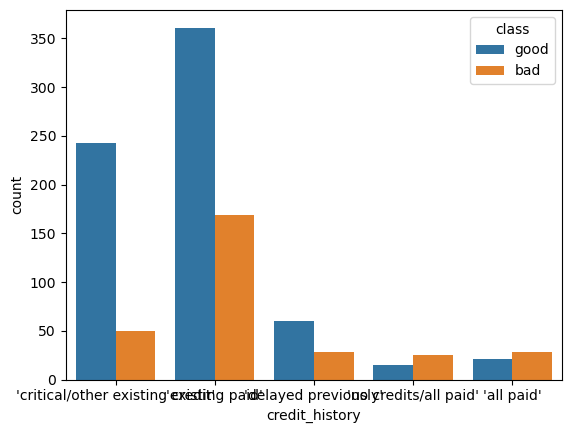

'critical/other existing credit' 293
good    0.829352
bad     0.170648
Name: class, dtype: float64
'existing paid' 530
good    0.681132
bad     0.318868
Name: class, dtype: float64
'delayed previously' 88
good    0.681818
bad     0.318182
Name: class, dtype: float64
'no credits/all paid' 40
bad     0.625
good    0.375
Name: class, dtype: float64
'all paid' 49
bad     0.571429
good    0.428571
Name: class, dtype: float64


In [8]:
get_information('credit_history')

In [9]:
credit_scoring.groupby(
    'credit_history')['installment_commitment'].mean()

credit_history
'all paid'                          3.122449
'critical/other existing credit'    3.044369
'delayed previously'                2.920455
'existing paid'                     2.950943
'no credits/all paid'               2.675000
Name: installment_commitment, dtype: float64

In [10]:
credit_scoring.groupby(
    'credit_history')['duration'].mean()

credit_history
'all paid'                          22.693878
'critical/other existing credit'    19.488055
'delayed previously'                26.215909
'existing paid'                     20.111321
'no credits/all paid'               27.875000
Name: duration, dtype: float64

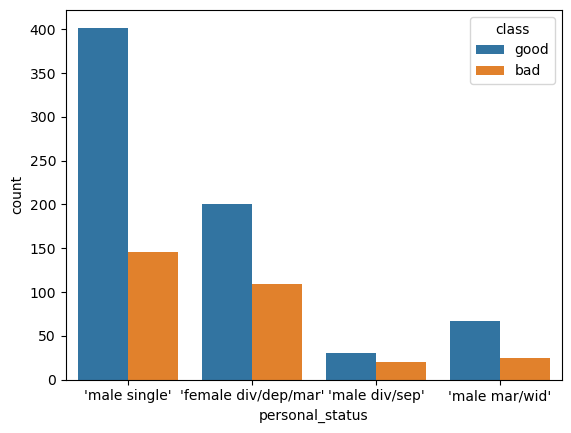

'male single' 548
good    0.733577
bad     0.266423
Name: class, dtype: float64
'female div/dep/mar' 310
good    0.648387
bad     0.351613
Name: class, dtype: float64
'male div/sep' 50
good    0.6
bad     0.4
Name: class, dtype: float64
'male mar/wid' 92
good    0.728261
bad     0.271739
Name: class, dtype: float64


In [11]:
get_information('personal_status')

In [12]:
credit_scoring.groupby(
    'personal_status')['installment_commitment'].mean()

personal_status
'female div/dep/mar'    2.829032
'male div/sep'          2.500000
'male mar/wid'          3.000000
'male single'           3.093066
Name: installment_commitment, dtype: float64

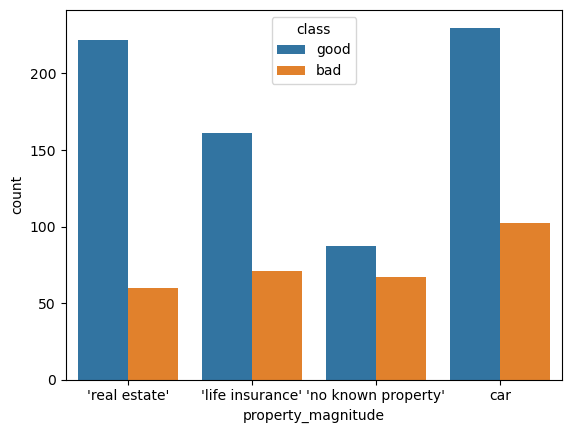

'real estate' 282
good    0.787234
bad     0.212766
Name: class, dtype: float64
'life insurance' 232
good    0.693966
bad     0.306034
Name: class, dtype: float64
'no known property' 154
good    0.564935
bad     0.435065
Name: class, dtype: float64
car 332
good    0.692771
bad     0.307229
Name: class, dtype: float64


In [13]:
get_information('property_magnitude')

In [14]:
credit_scoring.groupby(
    'property_magnitude')['installment_commitment'].mean()

property_magnitude
'life insurance'       2.931034
'no known property'    3.090909
'real estate'          2.911348
car                    3.000000
Name: installment_commitment, dtype: float64

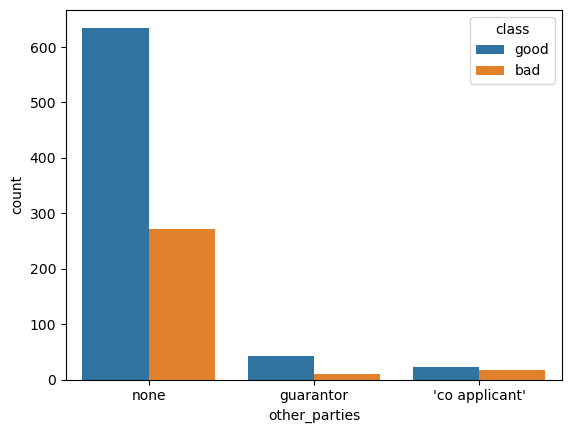

none 907
good    0.70011
bad     0.29989
Name: class, dtype: float64
guarantor 52
good    0.807692
bad     0.192308
Name: class, dtype: float64
'co applicant' 41
good    0.560976
bad     0.439024
Name: class, dtype: float64


In [15]:
get_information('other_parties')

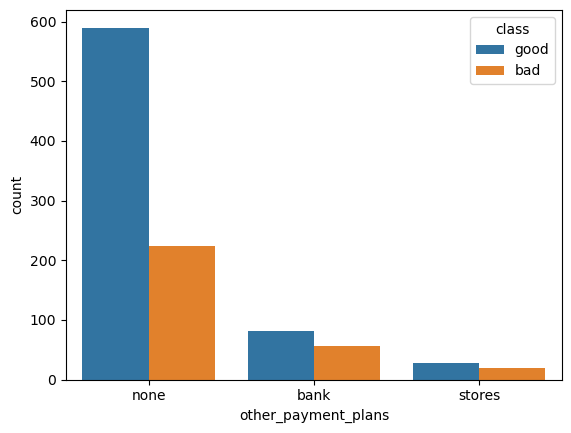

none 814
good    0.724816
bad     0.275184
Name: class, dtype: float64
bank 139
good    0.589928
bad     0.410072
Name: class, dtype: float64
stores 47
good    0.595745
bad     0.404255
Name: class, dtype: float64


In [16]:
get_information('other_payment_plans')

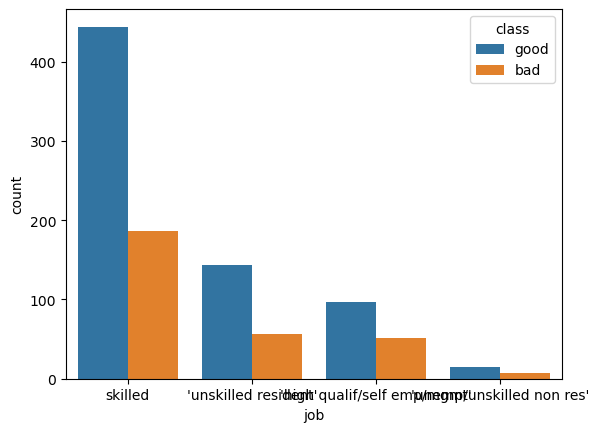

skilled 630
good    0.704762
bad     0.295238
Name: class, dtype: float64
'unskilled resident' 200
good    0.72
bad     0.28
Name: class, dtype: float64
'high qualif/self emp/mgmt' 148
good    0.655405
bad     0.344595
Name: class, dtype: float64
'unemp/unskilled non res' 22
good    0.681818
bad     0.318182
Name: class, dtype: float64


In [17]:
get_information('job')

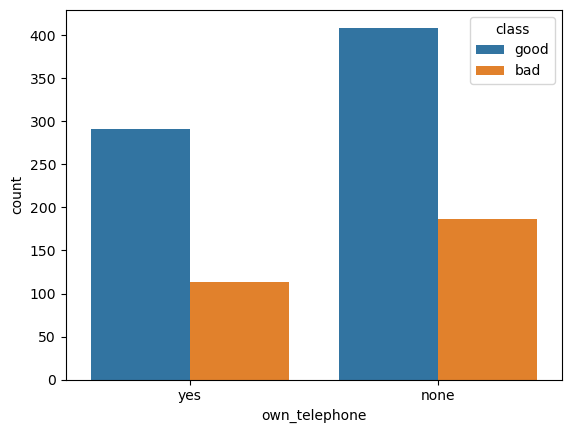

yes 404
good    0.720297
bad     0.279703
Name: class, dtype: float64
none 596
good    0.686242
bad     0.313758
Name: class, dtype: float64


In [18]:
get_information('own_telephone')

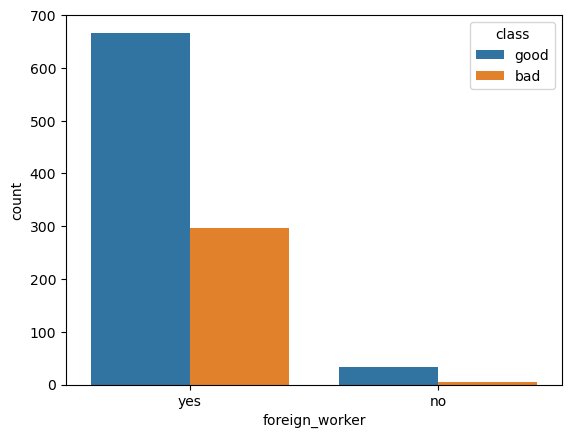

yes 963
good    0.692627
bad     0.307373
Name: class, dtype: float64
no 37
good    0.891892
bad     0.108108
Name: class, dtype: float64


In [19]:
get_information('foreign_worker')

In [20]:
credit_scoring[credit_scoring['savings_status']=='\'>=1000\''].property_magnitude.value_counts()

'real estate'          21
car                    12
'life insurance'       10
'no known property'     5
Name: property_magnitude, dtype: int64

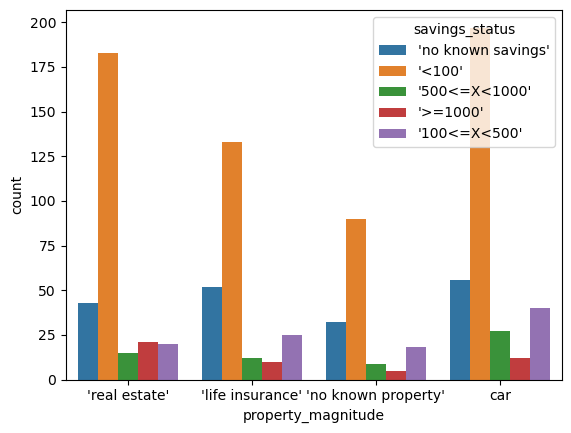

'real estate' 282
'<100'                0.648936
'no known savings'    0.152482
'>=1000'              0.074468
'100<=X<500'          0.070922
'500<=X<1000'         0.053191
Name: savings_status, dtype: float64
'life insurance' 232
'<100'                0.573276
'no known savings'    0.224138
'100<=X<500'          0.107759
'500<=X<1000'         0.051724
'>=1000'              0.043103
Name: savings_status, dtype: float64
'no known property' 154
'<100'                0.584416
'no known savings'    0.207792
'100<=X<500'          0.116883
'500<=X<1000'         0.058442
'>=1000'              0.032468
Name: savings_status, dtype: float64
car 332
'<100'                0.593373
'no known savings'    0.168675
'100<=X<500'          0.120482
'500<=X<1000'         0.081325
'>=1000'              0.036145
Name: savings_status, dtype: float64


In [21]:
sns.countplot(data=credit_scoring, x='property_magnitude', hue='savings_status')
plt.show()

# table
for x in credit_scoring['property_magnitude'].unique():
    print(x, credit_scoring[credit_scoring['property_magnitude']==x].shape[0])
    print(credit_scoring[credit_scoring['property_magnitude']==x]['savings_status'].value_counts(True))

## Checking which categorical variables have the best chi2 scores 

In [22]:
from sklearn.feature_selection import chi2, SelectKBest

In [23]:
data = pd.read_csv('credit.csv')
x = data.iloc[:,:-1]
y = data['class']

In [24]:
string = ['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker']

In [25]:
# Categorize all the string features
def myohc(df, var):
    uniques = df[var].unique()
    count = len(df[var].unique())
    thismap ={}
    for i in range(count):
        thismap[uniques[i]] = i
        
    df.replace({var:thismap}, inplace=True)
    
for var in string:
    myohc(x, var)

In [26]:
x[string].head()

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,1,0,0,0,0,0,1,0
2,2,0,1,1,2,0,0,0,0,0,1,1,0
3,0,1,2,1,2,0,1,1,0,1,0,1,0
4,0,2,3,1,1,0,0,2,0,1,0,1,0


In [27]:
which = SelectKBest(chi2, k=9).fit(x[string], y).get_support()
print('these are the top 9 string features by chi2:')
feat_2 = np.array(string)[which]
print(feat_2)

these are the top 9 string features by chi2:
['checking_status' 'credit_history' 'purpose' 'employment'
 'personal_status' 'property_magnitude' 'other_payment_plans' 'housing'
 'foreign_worker']


Three features (checking_Status, employment, property_magnitude) are being converted into numerical features.

The categorical features which I HAVE to preprocess and use in my model are:
credit history (5 values)
purpose (11 values)
other payment plans (3 values)
housing (3 values)
foreign worker (2 values)
personal_status (4 values)

The features with 2 or 3 values can be one hot encoded, but credit history and purpose have too many unique values to be one hot coded. They would cause the curse of dimensionality. I am barely comfortable one hot encoding just these 3 features becaues they amount to 2+3+3=8 features.

To avoid the curse of dimensionality, I can encode the larger features with:
Frequency of value
Mean of target variable
Sum of target variable

In [29]:
for f in ['credit_history', 'personal_status', 'purpose']:
    print(f)
    print(data[f].value_counts(), '\n')

credit_history
'existing paid'                     530
'critical/other existing credit'    293
'delayed previously'                 88
'all paid'                           49
'no credits/all paid'                40
Name: credit_history, dtype: int64 

personal_status
'male single'           548
'female div/dep/mar'    310
'male mar/wid'           92
'male div/sep'           50
Name: personal_status, dtype: int64 

purpose
buy_radio_tv               280
buy_new_car                234
buy_furniture_equipment    181
buy_used_car               103
business                    97
education                   50
repairs                     22
buy_domestic_appliance      12
other                       12
retraining                   9
Name: purpose, dtype: int64 



Credit history, personal status, purpose have very differing bin sizes for each varible.

Therefore I will use mean for credit_history and personal_status.
For purpose I will tokenize the strings and create a column for each word that appears, then run chi2 test on each column and pick the best few ones.